# Accessing Data via Web APIs


In [29]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

## The New York Times API: All the Data Thats Fit to Query

introduction here

## Step 1: Establishing the Connection

Put the API Key you just created in the `api_key` variable in the cell below

In [1]:
# Put your API key here
api_key = ""

In [2]:
#Save your key locally
with open("nyt_api_key.txt", "w") as f:
    f.write(api_key)

To access the NYTimes' databases, we'll be using a third-party library called [pynytimes](https://github.com/michadenheijer/pynytimes). This package provides an easy to use tool for accessing the wealth of data hosted by the Times.

To install the library, follow these instructions taken from their github repo.

### Installation

There are multiple options to install `pynytimes`, but the easiest is by just installing it using `pip` in the Jupyter notebook itself, using a magic command:

In [ ]:
!pip install pynytimes

You can also install it via the command line or Anaconda Navigator - whichever you're more comfortable with.

Once the package installed, let's go ahead import the library and initialize a connection to their servers using our api keys.

In [3]:
# Import the NYTAPI object which we'll use to access the API
from pynytimes import NYTAPI

In [4]:
# Intialize the NYT API class into an object using your API key
nyt = NYTAPI(api_key, parse_dates=True)

Ta-da! We are now ready to make some API calls!

## Step 2: Making API Calls

Here's comes the fun part. Now that we've established a connection to New York Times' rich database, let's go over what kind of data and privileges we have access to.

### APIs

[Here is the collection of the APIs the NYT gives us:](https://developer.nytimes.com/apis)

- [Top stories](https://developer.nytimes.com/docs/top-stories-product/1/overview): Returns an array of articles currently on the specified section 
- [Most viewed/shared articles](https://developer.nytimes.com/docs/most-popular-product/1/overview): Provides services for getting the most popular articles on NYTimes.com based on emails, shares, or views.
- [Article search](https://developer.nytimes.com/docs/articlesearch-product/1/overview): Look up articles by keyword. You can refine your search using filters and facets.
- [Books](https://developer.nytimes.com/docs/books-product/1/overview): Provides information about book reviews and The New York Times Best Sellers lists.
- [Movie reviews](https://developer.nytimes.com/docs/movie-reviews-api/1/overview): Search movie reviews by keyword and opening date and filter by Critics' Picks.
- [Times Wire](https://developer.nytimes.com/docs/timeswire-product/1/overview): Get links and metadata for Times' articles as soon as they are published on NYTimes.com. The Times Newswire API provides an up-to-the-minute stream of published articles.
- [Tag query (TimesTags)](https://developer.nytimes.com/docs/timestags-product/1/overview): Provide a string of characters and the service returns a ranked list of suggested terms.
- [Archive metadata](https://developer.nytimes.com/docs/archive-product/1/overview): Returns an array of NYT articles for a given month, going back to 1851.

In this workshop we go over a few of the APIs and do some light data analysis of the data we pull.

### Top Stories API

Let's look at the top stories of the day. All we have to do is call a single method on the `nyt` object:

In [ ]:
# Get all the top stories from the home page
top_stories = nyt.top_stories()

print(f"top_stories is a list of length {len(top_stories)}")

The `top_stories` method has a single paramater called `section` parameter defaults to "home".

In [ ]:
# Preview the results
top_stories[:3]

This is pretty typical output for data pulled from an API. We are looking at a list of nested JSON dictionaries.

When working with a new API, a good way to establish an understanding of the data is to inspect a single object in the collection. Let's grab the first story in the array and inspect its attributes and data:

In [ ]:
top_story = top_stories[0]
top_story

We are provided a diverse collection of data for the article ranging from the expected (title, author, section) and to NLP-derived information such as named entities. Notice that the full article itself is not included - the API does not provide that to us.

**Does anything about the data stand out to you? What bits of information could be useful to you and your research needs?**

If we are interested in a specific section, we can pass in one of the following tags into the `section` parameter:


```arts```, ```automobiles```, ```books```, ```business```, ```fashion```, ```food```, ```health```, ```home```, ```insider```, ```magazine```, ```movies```, ```national```, ```nyregion```, ```obituaries```, ```opinion```, ```politics```, ```realestate```, ```science```, ```sports```, ```sundayreview```, ```technology```, ```theater```, ```tmagazine```, ```travel```, ```upshot```, and ```world```.


In [ ]:
top_arts_stories = nyt.top_stories(section='arts')
print(top_arts_stories[0]['section'])
top_arts_stories[0]

### Challenge 1: Find the top stories for a section

- Choose 2 sections. Grab their top stories and store them in two separate lists.
- How many stories are each in section?
- What is the title of the first story in each list?

In [ ]:
# Challenge 1 solution here




### Organizing the API Results into a `pandas` DataFrame

In order to conduct subsequent data analysis, we need to convert the list of JSON data to a `pandas` DataFrame. `pandas` allows us to simply pass in the JSON list and produce a clean table in one line of code. 

First, let's see what happens when we pass in `top_stories` to `pd.json_normalize`:

In [26]:
# Convert to DataFrmae
df = pd.json_normalize(top_stories)
# View the first 5 rows
df.head()

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,us,politics,Jan. 6 Inquiry Subpoenas Giuliani and Legal Te...,The House committee investigating the Capitol ...,https://www.nytimes.com/2022/01/18/us/politics...,nyt://article/84d52f73-2547-52ee-808b-4c0b39ba...,By Luke Broadwater,Article,2022-01-18 18:42:30-05:00,2022-01-18 17:25:25-05:00,2022-01-18 17:25:25-05:00,,,"[Storming of the US Capitol (Jan, 2021), Voter...",[],"[Giuliani, Rudolph W, Ellis, Jenna (Attorney),...",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3IlkFIz
1,us,politics,Prosecutors Said to Have Asked About Trump’s R...,A court filing by a defendant in a Capitol rio...,https://www.nytimes.com/2022/01/18/us/politics...,nyt://article/d46fd5ff-8171-5153-b9a4-d9935a16...,By Alan Feuer,Article,2022-01-18 18:31:57-05:00,2022-01-18 18:27:50-05:00,2022-01-18 18:27:50-05:00,,,"[Storming of the US Capitol (Jan, 2021), Unite...","[House of Representatives, Justice Department]","[Trump, Donald J, Straka, Brandon]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3tCgd3M
2,us,politics,Blinken Will Meet With Russia as U.S. Pushes f...,Secretary of State Antony J. Blinken will meet...,https://www.nytimes.com/2022/01/18/us/politics...,nyt://article/9280bf9e-0806-5d68-8932-508ac450...,By Michael Crowley and Anton Troianovski,Article,2022-01-18 17:52:34-05:00,2022-01-18 13:15:07-05:00,2022-01-18 13:15:07-05:00,,,"[United States International Relations, United...","[North Atlantic Treaty Organization, State Dep...","[Blinken, Antony J, Lavrov, Sergey V]","[Russia, Ukraine]",[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3nBgTml
3,nyregion,,New York City’s mayor says ‘we are winning’ ag...,The number of known cases is still much higher...,https://www.nytimes.com/2022/01/18/nyregion/er...,nyt://article/b9730ac3-f530-5c50-a15c-69dc7b7c...,By Emma G. Fitzsimmons and Sharon Otterman,Article,2022-01-18 17:57:48-05:00,2022-01-18 13:32:57-05:00,2022-01-18 13:32:57-05:00,,,"[Vaccination and Immunization, Coronavirus (20...",[],"[Adams, Eric L]",[New York City],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3GIlxGz
4,business,,"Microsoft will buy Activision Blizzard, bettin...","With the deal, the largest in the software mak...",https://www.nytimes.com/2022/01/18/business/mi...,nyt://article/c52eda4d-59d9-5db8-a1bd-9286203f...,"By Karen Weise, Andrew Ross Sorkin, Kellen Bro...",Article,2022-01-18 17:39:36-05:00,2022-01-18 08:37:26-05:00,2022-01-18 08:37:26-05:00,,,"[Computer and Video Games, Mergers, Acquisitio...","[Activision Blizzard Inc, Microsoft Corp]","[Kotick, Bobby, Nadella, Satya]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/34Q2c8j


In [20]:
# Inspect the metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   section              60 non-null     object
 1   subsection           60 non-null     object
 2   title                60 non-null     object
 3   abstract             60 non-null     object
 4   url                  60 non-null     object
 5   uri                  60 non-null     object
 6   byline               60 non-null     object
 7   item_type            60 non-null     object
 8   updated_date         60 non-null     object
 9   created_date         60 non-null     object
 10  published_date       60 non-null     object
 11  material_type_facet  60 non-null     object
 12  kicker               60 non-null     object
 13  des_facet            60 non-null     object
 14  org_facet            60 non-null     object
 15  per_facet            60 non-null     object
 16  geo_facet 

For the most part, `pandas` does a good job of producing a table where:

- The columns correspond with the JSON dictionary keys from our API call.
- The number of rows matches the number of articles.
- Each cell holds the corresponding value found under that article's dictionary key.

However, there is one issue and that can be found in the multimedia column:

In [21]:
# Grab the multimedia column data
multimedia = df["multimedia"]
multimedia.head()

0    [{'url': 'https://static01.nyt.com/images/2022...
1    [{'url': 'https://static01.nyt.com/images/2022...
2    [{'url': 'https://static01.nyt.com/images/2022...
3    [{'url': 'https://static01.nyt.com/images/2022...
4    [{'url': 'https://static01.nyt.com/images/2022...
Name: multimedia, dtype: object

In [23]:
# Examine the first entry
multimedia.iloc[0]

[{'url': 'https://static01.nyt.com/images/2022/01/18/us/politics/18dc-investigate-1/18dc-investigate-1-superJumbo.jpg',
  'format': 'superJumbo',
  'height': 1365,
  'width': 2048,
  'type': 'image',
  'subtype': 'photo',
  'caption': 'Rudolph W. Giuliani at a news conference in November 2020. The House committee investigating the Jan. 6 attack subpoenaed him on Tuesday.',
  'copyright': 'Erin Schaff/The New York Times'}]

The data in the multimedia column is what's referred to as a "nested list". An issue may arise if we'd like to treat attributes in an article's `multimedia` data as distinct columns. Luckily, the `json_normalize` method has parameters that get around this.

In [27]:
# Call the json_normalize method by setting record_path to multimedia
# Set record_prefix to "multimedia_" to identify the data under multimedia
# Set meta to a list of columns from the original dataframe cols
cols = df.columns.tolist()
stories_df = pd.json_normalize(top_stories, record_path="multimedia", record_prefix="multimedia_", meta=cols)
stories_df.head()

,multimedia_url,multimedia_format,multimedia_height,multimedia_width,multimedia_type,multimedia_subtype,multimedia_caption,multimedia_copyright,section,subsection,...,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,https://static01.nyt.com/images/2022/01/18/us/...,superJumbo,1365,2048,image,photo,Rudolph W. Giuliani at a news conference in No...,Erin Schaff/The New York Times,us,politics,...,2022-01-18 17:25:25-05:00,2022-01-18 17:25:25-05:00,,,"[Storming of the US Capitol (Jan, 2021), Voter...",[],"[Giuliani, Rudolph W, Ellis, Jenna (Attorney),...",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3IlkFIz
1,https://static01.nyt.com/images/2022/01/18/us/...,superJumbo,1365,2048,image,photo,A new court filing said prosecutors had posed ...,Cooper Neill for The New York Times,us,politics,...,2022-01-18 18:27:50-05:00,2022-01-18 18:27:50-05:00,,,"[Storming of the US Capitol (Jan, 2021), Unite...","[House of Representatives, Justice Department]","[Trump, Donald J, Straka, Brandon]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3tCgd3M
2,https://static01.nyt.com/images/2022/01/18/us/...,superJumbo,1397,2048,image,photo,Secretary of State Antony J. Blinken’s mission...,Pool photo by Andrew Harnik,us,politics,...,2022-01-18 13:15:07-05:00,2022-01-18 13:15:07-05:00,,,"[United States International Relations, United...","[North Atlantic Treaty Organization, State Dep...","[Blinken, Antony J, Lavrov, Sergey V]","[Russia, Ukraine]",[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3nBgTml
3,https://static01.nyt.com/images/2022/01/18/mul...,superJumbo,1365,2048,image,photo,Mayor Eric Adams expressed optimism as New Yor...,Brittainy Newman for The New York Times,nyregion,,...,2022-01-18 13:32:57-05:00,2022-01-18 13:32:57-05:00,,,"[Vaccination and Immunization, Coronavirus (20...",[],"[Adams, Eric L]",[New York City],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3GIlxGz
4,https://static01.nyt.com/images/2022/01/18/bus...,superJumbo,1365,2048,image,photo,"In buying Activision Blizzard, the maker of Ca...",Benoit Tessier/Reuters,business,,...,2022-01-18 08:37:26-05:00,2022-01-18 08:37:26-05:00,,,"[Computer and Video Games, Mergers, Acquisitio...","[Activision Blizzard Inc, Microsoft Corp]","[Kotick, Bobby, Nadella, Satya]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/34Q2c8j


All the information from multimedias has been restructed to be on the same level as the rest of the data.

In [28]:
# Save data to csv file
stories_df.to_csv("top_nyt_articles.csv")

### Most Viewed and Most Shared APIs

Retrieving the most viewed and shared articles is also quite simple. The `days` parameter returns the most popular articles based on the last $N$ days. Keep in mind, however, that `days` can only take on one of three values: 1, 7, or 30.

In [37]:
# Retrieve the most viewed articles for today.
# The days parameter defaults to 1
most_viewed_today = nyt.most_viewed()
print(f"Title: {most_viewed_today[0]['title']}")
print(f"Section: {most_viewed_today[0]['section']}")
most_viewed_today[0]

Title: Who Is King of Florida? Tensions Rise Between Trump and a Former Acolyte.
Section: U.S.


{'uri': 'nyt://article/f81238c5-d68e-54d9-a6ee-4f0ccb05bc9c',
 'url': 'https://www.nytimes.com/2022/01/16/us/politics/trump-desantis.html',
 'id': 100000008160622,
 'asset_id': 100000008160622,
 'source': 'New York Times',
 'published_date': datetime.date(2022, 1, 16),
 'updated': datetime.datetime(2022, 1, 18, 9, 0, 3),
 'section': 'U.S.',
 'subsection': 'Politics',
 'nytdsection': 'u.s.',
 'adx_keywords': 'Presidential Election of 2024;Politics and Government;Coronavirus (2019-nCoV);DeSantis, Ron;Trump, Donald J;Republican Party;Florida',
 'column': None,
 'byline': 'By Jonathan Martin and Maggie Haberman',
 'type': 'Article',
 'title': 'Who Is King of Florida? Tensions Rise Between Trump and a Former Acolyte.',
 'abstract': 'A spat over Covid has exposed friction between the former president and a rising G.O.P. governor unwilling to curb his ambitions.',
 'des_facet': ['Presidential Election of 2024',
  'Politics and Government',
  'Coronavirus (2019-nCoV)'],
 'org_facet': ['Republi

How many stories are provided to us via this function call?

In [35]:
len(most_viewed_today)

20

For this piece of data, we can consult a guide or what's known as a schema to understand the information at our finger tips.

The [Most Viewed Schema](https://developer.nytimes.com/docs/most-popular-product/1/types/ViewedArticle) can answer any questions we may have about this article's data:

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| column   | string        | Deprecated. Set to null.        |
| section   | string        | Article's section (e.g. Sports).        |
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |

To pull most popular articles for the past weekend and month, we pass the numbers 7 or 30 into `days`

In [38]:
most_viewed_week = nyt.most_viewed(days=7)
most_viewed_month = nyt.most_viewed(days=30)

What is the most viewed article of the last week?

In [41]:
most_viewed_week[0]['title']

'Bob Saget, Comic Who Starred in the Sitcom ‘Full House,’ Dies at 65'

What is the most viewed article of the last month?

In [42]:
most_viewed_month[0]['title']

'What Are the Symptoms of Omicron?'

### Challenge 2: Most Shared Stories

The `most_shared` method is similiar to `most_viewed` except that it has an argument called `method` which is used to show the most shared articles using `'email'` or `'facebook'`.

- Grab the most shared articles for both methods for the past month.
- How many articles show up in both lists? (Hint: use the `uri` key)
- Bonus: Use the [Shared Article](https://developer.nytimes.com/docs/most-popular-product/1/types/SharedArticle) schema table to help you answer a question you may have about the data.

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| subsection   | string        | Article's subsection (e.g. Politics). Can be empty |
| column   | string        | Deprecated. Set to null.        |
| eta_id   | integer        | Deprecated. Set to 0.|
| section   | string        | Article's section (e.g. Sports).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| nytdsection   | string        | Article's section|
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| updated   | string        | When the article was last updated (e.g. 2021-05-12 06:32:03).|
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |
| uri   | string        | An article's globally unique identifier.      |

In [44]:
# Challenge 2 solution here




### Article Search API

Let's take it up a notch and use the search API to retrieve a set of articles about a particular topic in a chosen period of time.

We'll use the `article_search` function. Two relevant parameters include:

- `query`: The search query
- `results`: Number of articles returned. The default is 10.

Let's try pulling the 20 most recent articles about Berkeley:

In [61]:
articles = nyt.article_search(query = "Berkeley", results = 20)

Let's look at the main headlines of these articles:

In [65]:
headlines = [article['headline']['main'] for article in articles]
headlines

['Victim of Berkeley Balcony Collapse Dies in Ireland',
 'Rennie Davis, One of the Chicago Seven, Traded Activism for Inner Peace',
 'Saturday’s Cal-U.S.C. game has been delayed by Covid.',
 '5 Things to Do This Weekend',
 'What You Get for $1 Million in California',
 'The Past and Future of People’s Park',
 '$1 Million Homes in California',
 'Climate Exhibitions Look Beyond Declarations of Calamity',
 'The Nobel in economics goes to three who find experiments in real life.',
 'She Face-Planted Into Her Salad at the Country Club. Who Killed Her?',
 'Charles Sellers, 98, Historian Who Upset the Postwar Consensus, Dies',
 'What if Gavin Newsom resigned before the recall election?',
 '‘Gender Alchemy’ Is Transforming Art for the 21st Century',
 'House Hunting: Is This Price Right?',
 'How a Surprise Discovery of Photographs From the 1960s Meets the Moment',
 'Robert Middlekauff, Historian of Washington and His War, Dies at 91',
 'Gail Omvedt, 80, Dies; India Became Her Home, the Caste Sys

We can also take a peek at the first article provided. We're going to remove the `multimedia` key in order to make it more easy to view:

In [66]:
del articles[0]['multimedia']
articles[0]

{'abstract': 'Aoife Beary, who was left with life-changing injuries after the 2015 accident, died on New Year’s Day, her family said.',
 'web_url': 'https://www.nytimes.com/2022/01/03/world/europe/berkeley-balcony-collapse-death.html',
 'snippet': 'Aoife Beary, who was left with life-changing injuries after the 2015 accident, died on New Year’s Day, her family said.',
 'lead_paragraph': 'DUBLIN — A survivor of a balcony collapse that killed six students in Berkeley, Calif., in 2015 has died in a hospital in her native Dublin, her family said Monday. She was 27.',
 'print_section': 'A',
 'print_page': '7',
 'source': 'The New York Times',
 'headline': {'main': 'Victim of Berkeley Balcony Collapse Dies in Ireland',
  'kicker': None,
  'content_kicker': None,
  'print_headline': 'Woman Who Survived 2015 Balcony Collapse Dies of Her Injuries at 27',
  'name': None,
  'seo': None,
  'sub': None},
 'keywords': [{'name': 'glocations',
   'value': 'Berkeley (Calif)',
   'rank': 1,
   'major': 

Notice that not all article data comes in the same format. Data from the search API is presented differently from that of the Most Viewed and Top Stories APIs.

There are schemas for the above data. Unfortunately, they do not have definitions.

- [Article Schema](https://developer.nytimes.com/docs/articlesearch-product/1/types/Article)
- [Byline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Byline)
- [Headline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Headline)
- [Keyword](https://developer.nytimes.com/docs/articlesearch-product/1/types/Keyword)
- [Multimedia](https://developer.nytimes.com/docs/articlesearch-product/1/types/Multimedia)
- [Person](https://developer.nytimes.com/docs/articlesearch-product/1/types/Person)

Let's try this again, but for a specific time period. 

For example, how would we retrieve all the articles about the first two months of the George Floyd protests?

We need to pass a dictionary to the `dates` argument which contains keys named "begin" and "end". Those two keys point to `datetime` objects that we'll use as time markers. We're also going to use the `options` argument to filter and sort our results.

In [67]:
# Set up start and end date objects
begin = datetime(2020, 5, 23) # May 23, 2020
end = datetime(2020, 7, 23) # July 23, 2020

# Create a dictionary containing the datetime objects
date_dict = {"begin": begin, "end": end}

# Create options dictionary
options_dict = {
    # Sort from earliest to latest
    "sort": "oldest",
    # Return only articles from New York Times (filters out other sources such as AP and Reuters)
    "sources": ["New York Times"],
    # Return only news, analyses, and articles
    "type_of_material": ["News Analysis", "News", "Article"]
}

articles = nyt.article_search(
    query="George Floyd protest",
    results=100,
    dates=date_dict,
    options=options_dict)

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/pynytimes/helpers/article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [68]:
# Grab first article and drop the multimedia key to reduce clutter
article = articles[0]
del article["multimedia"]

# Check out results
article

{'abstract': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'web_url': 'https://www.nytimes.com/2020/05/26/us/minneapolis-police-man-died.html',
 'snippet': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'lead_paragraph': 'The F.B.I. and Minnesota law enforcement authorities are investigating the arrest of a black man who died after being handcuffed and pinned to the ground by an officer’s knee, in an episode that was recorded on video by a bystander and that sparked large protests in Minneapolis on Tuesday.',
 'print_section': 'A',
 'print_page': '23',
 'source': 'The New York Times',
 'headline': {'main': '‘I Can’t Breathe’: 4 Minneapolis Officers Fired After Black Man Dies in Custody',
  'kicker': None,
  'content_kicker': None,
  'print_headline': ' F.B.I. Investigating Arrest; 4 Police Officers Lose Jobs',
  'name': None,
  'se

### Challenge 3: Article Searching

- Retrieve a set of articles for a query of your choice.
- Use a relevant time interval in constructing your `dates` dictionary
- Use `type_of_material` and `section_name` as keys in your `options` dictionary.
    - For `type_of_material` values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#type-of-material-values).
    - For `section_name` values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#section-name-values).

In [70]:
# Challenge 3 Solution




## Step 3: Data Analysis

Now, we'll perform a data analysis on many articles about the 2020 presidential election.

We are working with previously queried set of articles because making the API call will take too much time. The code used to queried the articles we'll analyze can be found in the following cell:

### Query Using the Article Search API

In [10]:
# Create datetime objects
begin = datetime(2020, 9, 7) # September 7, 2020
end = datetime(2020, 11, 7) # November 7, 2020
date_dict = {"begin": begin, "end": end}

options_dict = {
    "sort": "oldest",
    "sources": ["New York Times",],
    "type_of_material": ["News Analysis", "News", "Article", "Editorial"]
}

# To get the dataset we use, set n_results to 2000
n_results = 2000
# n_results = 10

# Perform article search query
articles = nyt.article_search(
     query="presidential election",
     results=n_results,
     dates=date_dict,
     options=options_dict)

# Create DataFrame 
df = pd.json_normalize(articles)

# Save DataFrame
df.to_pickle("election2020_articles.pkl")

/opt/homebrew/Caskroom/miniforge/base/envs/nlp/lib/python3.9/site-packages/pynytimes/helpers/article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


KeyboardInterrupt: 

In [12]:
df.to_pickle("election2020_articles.pkl")

Load in the previously saved data

In [71]:
df = pd.read_pickle("election2020_articles.pkl")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'election2020_articles.pkl'

In [ ]:
# Inspect metadata
df.info()

### Perform Sentiment Analysis

Sentiment analysis is a common task when working with text data. Let's track the sentiment of articles about the election over the two month time period. We'll use the `vadersentiment` package to evaluate the sentiment of each article.

According to the [VADER Github Repo](https://github.com/cjhutto/vaderSentiment), "VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is *specifically attuned to sentiments expressed in social media*."

We'll start by installing the `vadersentiment` library.

In [72]:
# Install the vadersentiment library
!pip install vadersentiment

     |████████████████████████████████| 125 kB 4.2 MB/s            


In [13]:
# Import the SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [18]:
# Initialize analyzer object
analyzer = SentimentIntensityAnalyzer()
# Calculate the polarity scores of the lead paragraph and save it in df
df["sentiment"] = df.lead_paragraph.apply(analyzer.polarity_scores)

In [19]:
# Inspect the sentiment column
df.sentiment.head()

0    {'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'co...
1    {'neg': 0.108, 'neu': 0.828, 'pos': 0.063, 'co...
2    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
3    {'neg': 0.037, 'neu': 0.963, 'pos': 0.0, 'comp...
4    {'neg': 0.202, 'neu': 0.736, 'pos': 0.062, 'co...
Name: sentiment, dtype: object

In [20]:
# View single row
df.sentiment.iloc[0]

{'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'compound': -0.296}

The `compound` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most negative) and +1 (most positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a "normalized, weighted composite score" is accurate. It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. 

Typical threshold values are:

1. **Positive Sentiment**: compound score $\geq 0.05$
 
2. **Neutral  Sentiment**: $-0.05 <$ compound score $< 0.05$
 
3. **Negative Sentiment**: compound score $\leq -0.05$

In [21]:
# Re-assign sentiment as the compound score
df["sentiment"] = df["sentiment"].apply(lambda x: x["compound"])

Let's get a sense of the distribution of scores by calculating some summary statistics and plotting a histogram:

In [23]:
# Summary statistics
df.sentiment.describe()

count    1803.000000
mean        0.053598
std         0.476783
min        -0.984300
25%        -0.296000
50%         0.000000
75%         0.458800
max         0.980100
Name: sentiment, dtype: float64

(-1.0, 1.0)

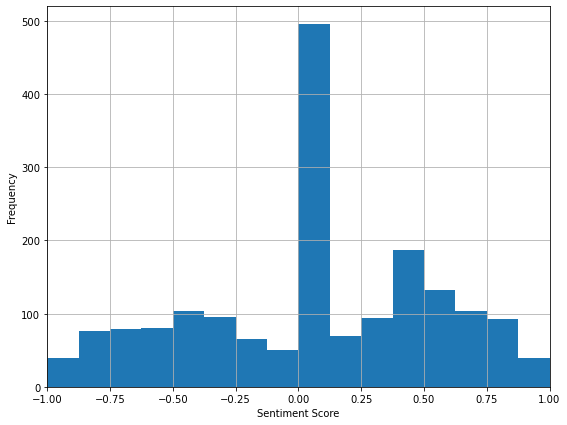

In [34]:
bins = np.linspace(-1, 1, 17)
df.sentiment.hist(bins=bins, figsize= (9, 7))
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.xlim([-1.0, 1.0])

#### Challenge 4. Answer questions about the data

- What are the 3 most positive and negative texts?
- Using the vader threshold for positive, neutral, and negative, how many article qualify for each of those labels?


In [ ]:
# Challenge 4 solution here




**How did sentiment fluctuate over the course of the campaign?**

In [ ]:
#Create a panda series using the publication dates as the index and sentiment scores as the values
sentiment_ts = pd.Series(index= df.pub_date.tolist(), data = df.sentiment.tolist())

In [ ]:
#Resample aka groupby the data using d for daily and w for weekly
daily = sentiment_ts.resample("d").mean()
weekly = sentiment_ts.resample("w").mean()

In [ ]:
#Daily average sentiment of articles.
daily.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

In [ ]:
#Weekly average sentiment of articles.
weekly.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

## Bonus Section: Handling Nested Arrays of Keywords

The Times has done us a favor in providing the named entities in the articles, thus relieving us of having to do the tagging ourselves. However, the data structure that it comes in can be tricky to handle. Here, we provide a short tutorial showing one way to cleanly extract keyword data.

In [7]:
# Refer to a sample article's set of keywords
df.keywords.iloc[1]

[{'name': 'subject',
  'value': 'Demonstrations, Protests and Riots',
  'rank': 1,
  'major': 'N'},
 {'name': 'subject', 'value': 'Music', 'rank': 2, 'major': 'N'},
 {'name': 'subject', 'value': 'Pop and Rock Music', 'rank': 3, 'major': 'N'},
 {'name': 'persons',
  'value': 'Lukashenko, Aleksandr G',
  'rank': 4,
  'major': 'N'},
 {'name': 'glocations', 'value': 'Belarus', 'rank': 5, 'major': 'N'},
 {'name': 'glocations', 'value': 'Minsk (Belarus)', 'rank': 6, 'major': 'N'},
 {'name': 'subject',
  'value': 'Politics and Government',
  'rank': 7,
  'major': 'N'},
 {'name': 'subject', 'value': 'Elections', 'rank': 8, 'major': 'N'}]

We see a number of things here:
- Each article's keywords are laid out in a list of dictionaries.
- A dictionary tell us the name, type, ranking, and major of the keyword.
- The five types of keywords are: subject, persons, glocations, organizations, and creative_works
- The ordering of the list corresponds to the ranking.
- All articles do not all have the same number of rankings, ranges from 1 - 19.

We've created a function to extract keyword data based on the ranking. This function will be applied over the pandas series of keyword data.

In [ ]:
"""Extracts keyword data based on ranking.

Parameters
----------
data : pd.DataFrame
    The dataframe containing the keywords.
rank : 
"""
def rank_extractor(data, rank):
    # Empty list return non
    if data == []:
        return None
    # Iterate over the list of keywords until you reach the keyword corresponding with the ranking.
    for i in data:
        if i["rank"] == rank:
            #return just keyword and its type in a dictionary form
            return {"name":i["name"], "value":i["value"]}

In [ ]:
# Extract the first, second, and third keywords
rank1 = df.keywords.apply(lambda x: rank_extractor(x,1))
rank2 = df.keywords.apply(lambda x: rank_extractor(x,2))
rank3 = df.keywords.apply(lambda x: rank_extractor(x,3))

In [ ]:
#View results
rank1.head()

Convert the series containing dictionaries to a dataframe

In [ ]:
rank1 = rank1.apply(pd.Series)
rank2 = rank2.apply(pd.Series)
rank3 = rank3.apply(pd.Series)
rank1.head()

Voila, nice clean format. Now can we conduct some light analysis.

In [ ]:
#Most frequent type of keyword in ranking #1
rank1.name.value_counts()


In [ ]:
# Most common glocation in rank1
rank1.query("name == 'glocations'").value.value_counts().head()